In [11]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam
import numpy as np

print(tf.__version__)

2.9.1


In [13]:
loaded_data = np.loadtxt('data/diabetes.csv', delimiter=',')

# training data / test data 분리
seperation_rate = 0.3  # 분리 비율
test_data_num = int(len(loaded_data) * seperation_rate)

np.random.shuffle(loaded_data)
test_data = loaded_data[ 0:test_data_num ]
training_data = loaded_data[ test_data_num: ]

# training_x_data / training_t__data 생성
training_x_data = training_data[ :, 0:-1]
training_t_data = training_data[ :, [-1]]

# test_x_data / test_t__data 생성
test_x_data = test_data[ :, 0:-1]
test_t_data = test_data[ :, [-1]]

print("loaded_data.shape = ", loaded_data.shape)
print("training_x_data.shape = ", training_x_data.shape)
print("training_t_data.shape = ", training_t_data.shape)
print("test_x_data.shape = ", test_x_data.shape)
print("test_t_data.shape = ", test_t_data.shape)

loaded_data.shape =  (759, 9)
training_x_data.shape =  (532, 8)
training_t_data.shape =  (532, 1)
test_x_data.shape =  (227, 8)
test_t_data.shape =  (227, 1)


In [14]:
# Logistic Regression 을 keras 이용하여 생성

model = Sequential()

# 노드 1개인 출력층 생성
model.add(Dense(training_t_data.shape[1], 
                input_shape=(training_x_data.shape[1],),
                activation='sigmoid'))

In [15]:
model.compile(optimizer=SGD(learning_rate=0.01), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [16]:
from datetime import datetime

start_time = datetime.now()

hist = model.fit(training_x_data, training_t_data, epochs=500, validation_split=0.2, verbose=2)
# verbose mode
# 0 = silent, 
# 1 = progress bar, 
# 2 = one line per epoch.

end_time = datetime.now()

print('\nElapsed Time => ', end_time - start_time)

Epoch 1/500
14/14 - 0s - loss: 0.7480 - accuracy: 0.4541 - val_loss: 0.7363 - val_accuracy: 0.4206 - 436ms/epoch - 31ms/step
Epoch 2/500
14/14 - 0s - loss: 0.7333 - accuracy: 0.4447 - val_loss: 0.7242 - val_accuracy: 0.4579 - 24ms/epoch - 2ms/step
Epoch 3/500
14/14 - 0s - loss: 0.7203 - accuracy: 0.4729 - val_loss: 0.7131 - val_accuracy: 0.4299 - 31ms/epoch - 2ms/step
Epoch 4/500
14/14 - 0s - loss: 0.7084 - accuracy: 0.4847 - val_loss: 0.7036 - val_accuracy: 0.4393 - 36ms/epoch - 3ms/step
Epoch 5/500
14/14 - 0s - loss: 0.6982 - accuracy: 0.5035 - val_loss: 0.6956 - val_accuracy: 0.4673 - 41ms/epoch - 3ms/step
Epoch 6/500
14/14 - 0s - loss: 0.6896 - accuracy: 0.5247 - val_loss: 0.6881 - val_accuracy: 0.5234 - 40ms/epoch - 3ms/step
Epoch 7/500
14/14 - 0s - loss: 0.6816 - accuracy: 0.5694 - val_loss: 0.6816 - val_accuracy: 0.5421 - 40ms/epoch - 3ms/step
Epoch 8/500
14/14 - 0s - loss: 0.6746 - accuracy: 0.6000 - val_loss: 0.6756 - val_accuracy: 0.5701 - 28ms/epoch - 2ms/step
Epoch 9/500
14

In [7]:
model.evaluate(test_x_data, test_t_data)

8/8 [==============================] - 0s 855us/step - loss: 0.4847 - accuracy: 0.7665


[0.48468589782714844, 0.7665198445320129]

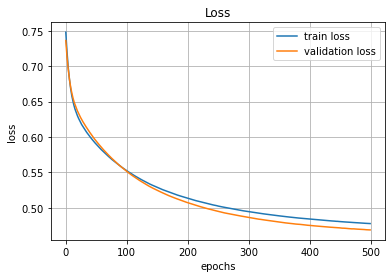

In [17]:
import matplotlib.pyplot as plt

plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')
plt.show()

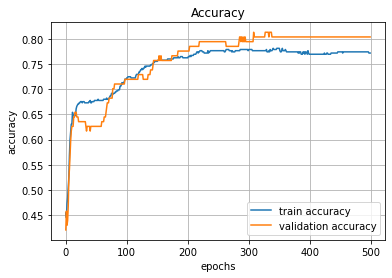

In [18]:
import matplotlib.pyplot as plt

plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()